# **Online Retail Data Visualisations**

## Objectives

# The notebook objective here is the load the cleaned retail data, then answer questions using charts using these Python libraries
* matplotlib
* seaborn 
* plotly express 

## Inputs

* The cleaned data is read from the file at Dataset\Processed\retail_processed.csv

## Outputs

* Visualisations are created to provide sales and marketing insights.

## Future considerations

* Work could be done to conduct customer segmentation analysis in order to target customers with marketing campaigns.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [26]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\marka\\ILP_Retail\\ILP-Retail\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [27]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [28]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\marka\\ILP_Retail\\ILP-Retail'

# Import Libraries

Libraries for visualizations

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


---

# First load the data, then answer questions using charts: matplotlib, seaborn and plotly express

In [30]:
# read the sales data
df = pd.read_csv("C:\\Users\\marka\\ILP_Retail\\ILP-Retail\\Dataset\\Processed\\retail_processed.csv",low_memory=False)


In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,UK_Customer,Cancels
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,True,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,True,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,True,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,True,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,True,NaN


In [32]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
Sales          float64
UK_Customer       bool
Cancels        float64
dtype: object

Test if the quantity sold of a product (StockCode) increases as the avg unit price decreases

matplotlib - scatter

documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html


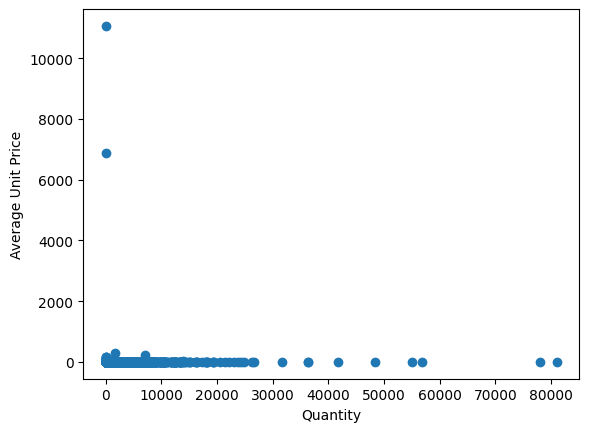

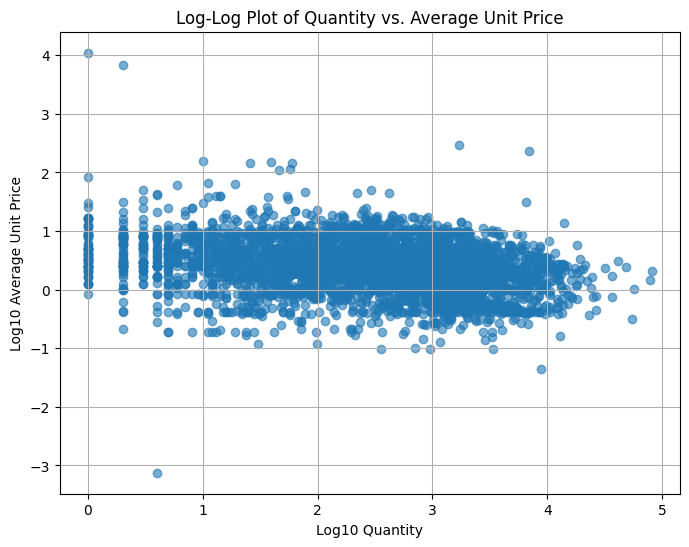

In [33]:
import matplotlib.pyplot as plt
import numpy as np

df['Average Unit Price'] = df['Sales'] / df['Quantity']

# Need a point for each StockCode
# Aggregate per StockCode
agg = df.groupby('StockCode').agg({
    'Quantity':'sum',
    'Average Unit Price':'mean'
}).reset_index()

plt.scatter(agg['Quantity'], agg['Average Unit Price'])
plt.xlabel('Quantity')
plt.ylabel('Average Unit Price')
#plt.show()

# take the log of x and Y

# Filter out non-positive values before log transform
agg = agg[(agg['Quantity'] > 0) & (agg['Average Unit Price'] > 0)]

# Apply log10 transform
agg['log_Quantity'] = np.log10(agg['Quantity'])
agg['log_AvgPrice'] = np.log10(agg['Average Unit Price'])

# Plot log-log scatter
plt.figure(figsize=(8, 6))
plt.scatter(agg['log_Quantity'], agg['log_AvgPrice'], alpha=0.6)
plt.xlabel('Log10 Quantity')
plt.ylabel('Log10 Average Unit Price')
plt.title('Log-Log Plot of Quantity vs. Average Unit Price')
plt.grid(True)
plt.show()


This shows that in general the quantity sold of a product (StockCode) increases as the avg unit price decreases

Are some countries dominant in terms of sales?
What is the distribution by number of transactions by Country?

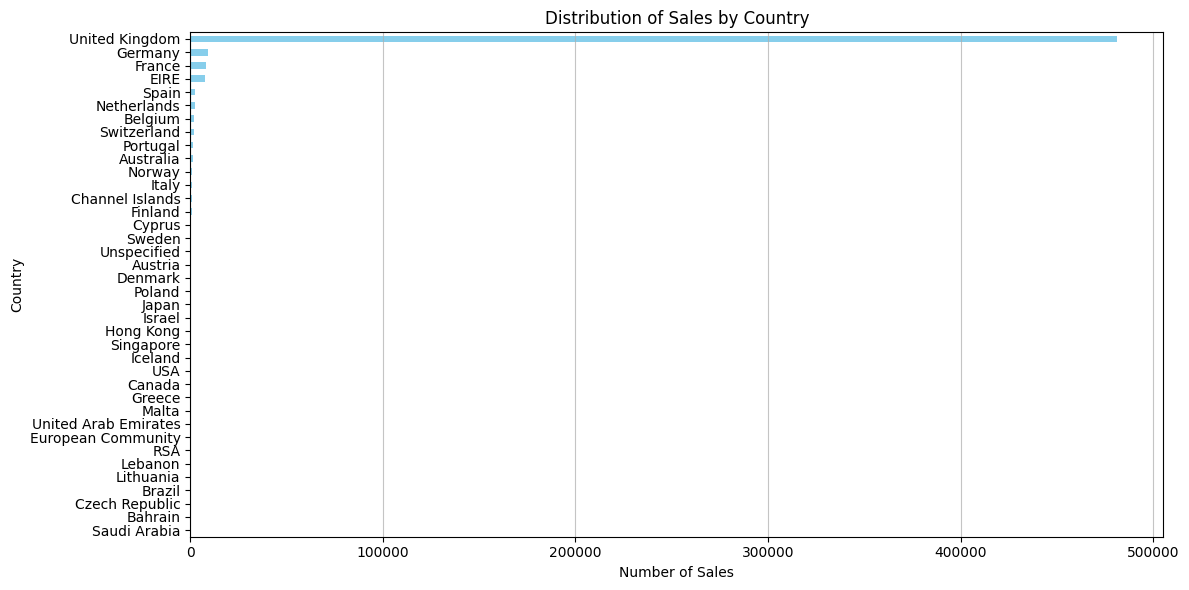

In [34]:
# Create a horizontal bar chart to illustrate
# sorted high to low on Number of Sales
country_sales = df['Country'].value_counts().sort_values(ascending=True)
# plot the distribution
plt.figure(figsize=(12,6))
country_sales.plot(kind='barh', color='skyblue')
plt.title('Distribution of Sales by Country')
plt.xlabel('Number of Sales')
plt.ylabel('Country')
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()


The UK is clearly dominant with the vast majority of transactions

# Seaborn charts

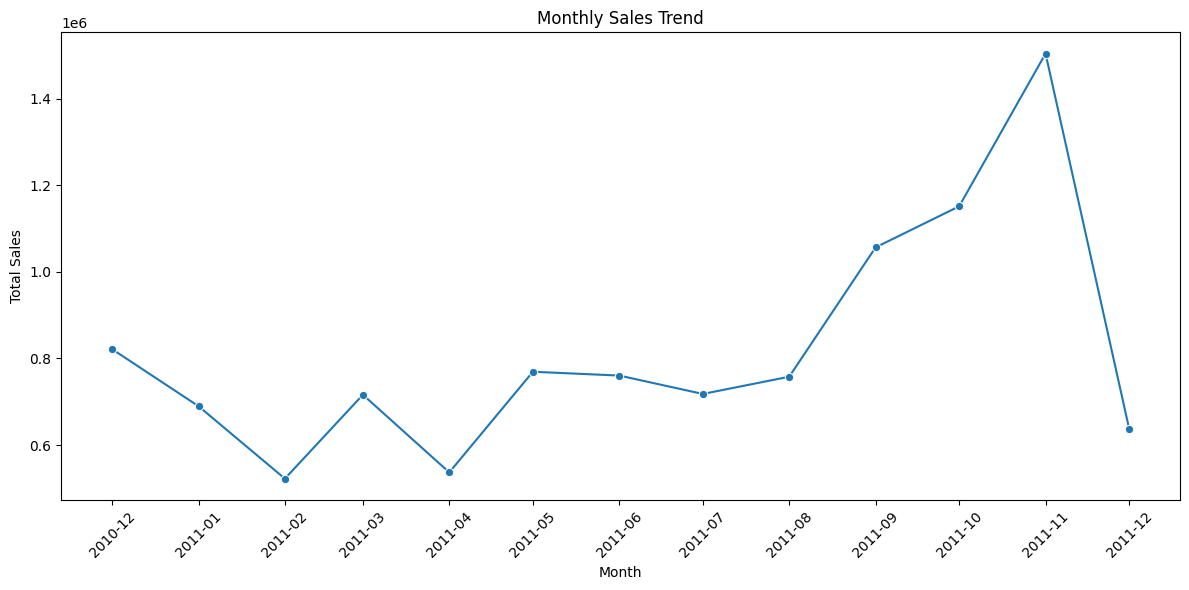

In [35]:
# Does Sales increase over time? What is the monthly trend?

# get the month of the InvoiceDate separately
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Extract Year-Month as a month period
df["InvoiceYearMonth"] = df["InvoiceDate"].dt.to_period("M")

# Aggregate sales by month
monthly_sales = df.groupby("InvoiceYearMonth")["Sales"].sum().reset_index()

# Convert back to datetime for plotting
monthly_sales["InvoiceYearMonth"] = monthly_sales["InvoiceYearMonth"].dt.to_timestamp()

# Use a seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="InvoiceYearMonth", y="Sales", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(
    ticks=monthly_sales["InvoiceYearMonth"],
    labels=monthly_sales["InvoiceYearMonth"].dt.strftime("%Y-%m"),
    rotation=45
)
plt.tight_layout()
plt.show()

Is there a weekly pattern? How do Christmas sales compare year-on-year?

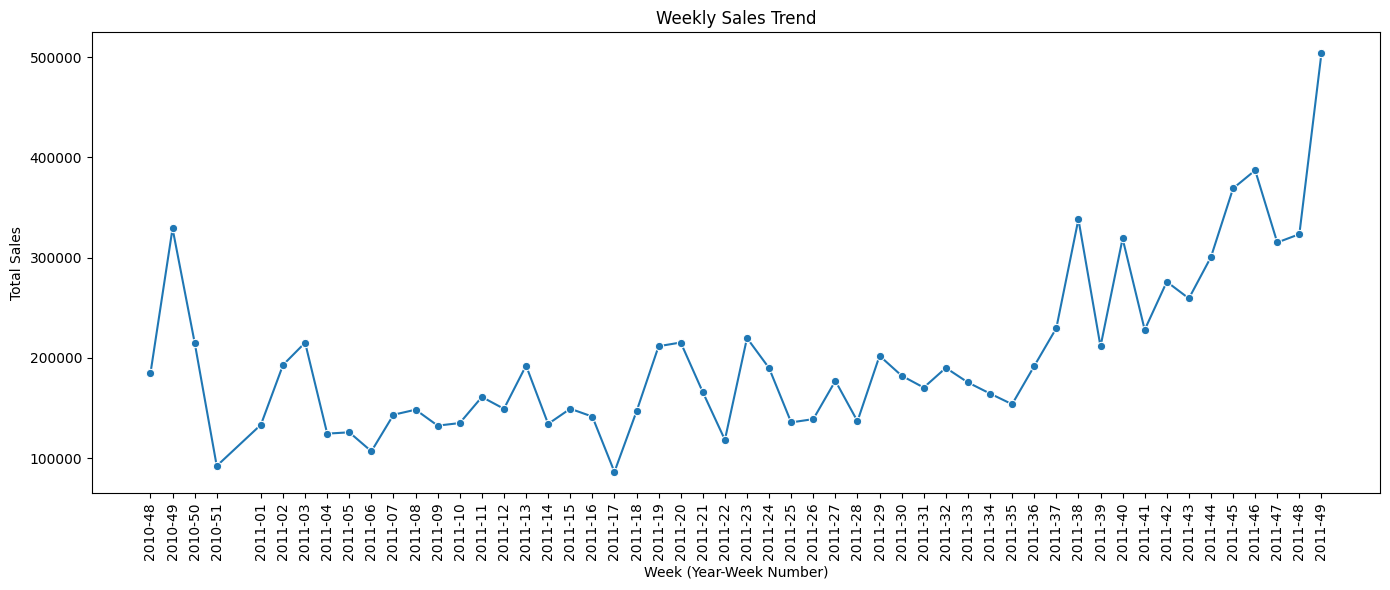

In [36]:
# Weekly sales?
# Extract Year-Week
df["InvoiceYearWeek"] = df["InvoiceDate"].dt.to_period("W")

# Aggregate sales by week
weekly_sales = df.groupby("InvoiceYearWeek")["Sales"].sum().reset_index()

# Convert back to datetime for plotting
weekly_sales["InvoiceYearWeek"] = weekly_sales["InvoiceYearWeek"].dt.start_time

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_sales, x="InvoiceYearWeek", y="Sales", marker="o")

# Show all week labels
plt.xticks(
    ticks=weekly_sales["InvoiceYearWeek"],
    labels=weekly_sales["InvoiceYearWeek"].dt.strftime("%Y-%W"),
    rotation=90
)

plt.title("Weekly Sales Trend")
plt.xlabel("Week (Year-Week Number)")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

This shows a clear increase in sales over the weeks and a spike in sales just before Christmas in the two years.

Is there a relationship between Day of the Week and time of day for sales?
Suspect that there are more sales at the weekend.
We can focus on UK sales.

---

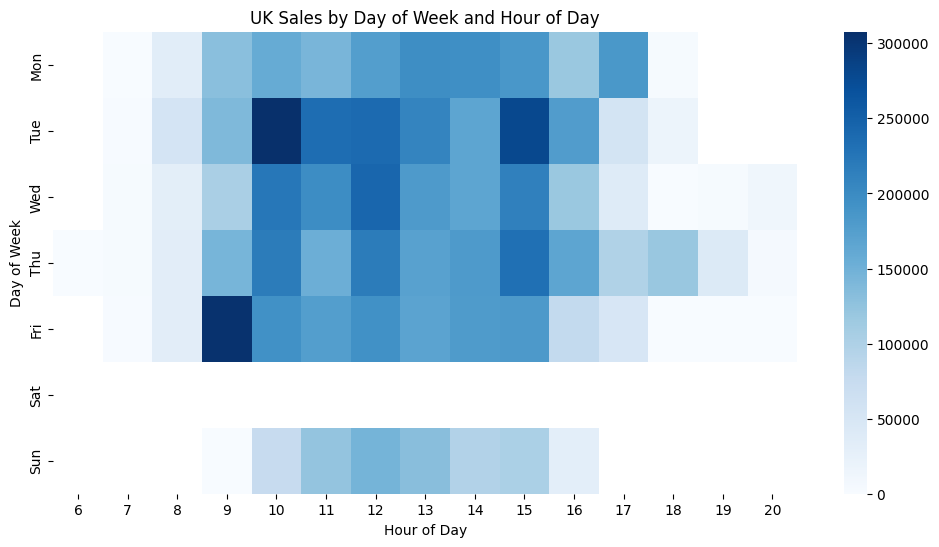

In [37]:
# get UK 
df_uk = df[df["Country"] == "United Kingdom"].copy()

# Extract day of week and hour
# Monday = 0, Sunday = 6
df_uk["DayOfWeek"] = df_uk["InvoiceDate"].dt.dayofweek # https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html
df_uk["Hour"] = df_uk["InvoiceDate"].dt.hour

# Map day numbers to names for readability - method suggested by Copilot
day_map = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
df_uk["DayName"] = df_uk["DayOfWeek"].map(day_map)

# Aggregate total sales
sales_heatmap = df_uk.groupby(["DayName", "Hour"])["Sales"].sum().reset_index()

# Pivot for heatmap format
sales_pivot = sales_heatmap.pivot(index="DayName", columns="Hour", values="Sales")

# Order days correctly
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sales_pivot = sales_pivot.reindex(day_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap="Blues")
plt.title("UK Sales by Day of Week and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

The suspicion was incorrect - in fact there are far fewer sales at the weekend.
And we can see that the sales are mostly between 8am and 8pm.

### plotly express charts
Apart from the UK, where are the other markets? Are they all in Europe?
View on a map of the world

In [38]:
# read the sales data
#df = pd.read_csv("C:\\Users\\marka\\ILP_Retail\\ILP-Retail\\Dataset\\Processed\\retail_processed.csv",low_memory=False)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,UK_Customer,Cancels,Average Unit Price,InvoiceYearMonth,InvoiceYearWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,True,NaN,2.55,2010-12,2010-11-29/2010-12-05
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,True,NaN,3.39,2010-12,2010-11-29/2010-12-05
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,True,NaN,2.75,2010-12,2010-11-29/2010-12-05
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,True,NaN,3.39,2010-12,2010-11-29/2010-12-05
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,True,NaN,3.39,2010-12,2010-11-29/2010-12-05


In [39]:
country_sales = df.groupby("Country")["Sales"].sum().reset_index()

fig = px.choropleth(
    country_sales,
    locations="Country",
    locationmode="country names",
    color="Sales",
    title="Total Sales by Country",
    color_continuous_scale="viridis"
)
fig.show()


Because the United Kingdom is so dominant, we will remove it to see where else we are selling


In [40]:
country_sales = df[df["Country"] != "United Kingdom"].groupby("Country")["Sales"].sum().reset_index()

fig = px.choropleth(
    country_sales,
    locations="Country",
    locationmode="country names",
    color="Sales",
    title="Total Sales by Country",
    color_continuous_scale="viridis"
)
fig.show()

We can now clearly differentiate countries: for example, zoom and drag the chart to look into Europe to see that the Netherlands is higher than France and Germany.

We can create an interactive version of the Day of week, Time of Day analysis

In [ ]:
# Days need the correct order for plotting
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Idea of making DayName categorical in pandas from Copilot
sales_heatmap["DayName"] = pd.Categorical(sales_heatmap["DayName"],
                                               categories=day_order, ordered=True)

# Plot with explicit category order
fig = px.density_heatmap(
    sales_heatmap,
    x="Hour",
    y="DayName",
    z="Sales",
    color_continuous_scale="Blues",
    title="UK Sales by Day of Week and Hour of Day",
    nbinsx=24,
    category_orders={"DayName": day_order, "Hour": list(range(24))}
)

# order on the axis 
fig.update_yaxes(categoryorder="array", categoryarray=day_order, autorange="reversed") # used Copilot for method for the order

fig.update_layout(xaxis_title="Hour of Day", yaxis_title="Day of Week")
fig.show()


How is the average basket size (number of unique products) related to the average sales value? 
Do larger baskets lead to larger sales?

In [49]:
import pandas as pd

# Calculate unique customers
num_customers = df["CustomerID"].nunique()

# Average basket size (unique products per invoice) and avg invoice sales value per country
basket_country = (
    df.groupby(["Country", "InvoiceNo"])
    .agg(
        unique_products=("StockCode", "nunique"),
        invoice_value=("Sales", "sum")
    )
    .groupby("Country")
    .agg(
        avg_basket_size=("unique_products", "mean"),
        avg_invoice_value=("invoice_value", "mean")
    )
    .reset_index()
)

num_customers, basket_country.head()


(4339,
      Country  avg_basket_size  avg_invoice_value
 0  Australia        20.754386        2429.014211
 1    Austria        23.411765         599.922353
 2    Bahrain         6.000000         251.380000
 3    Belgium        20.724490         420.370816
 4     Brazil        32.000000        1143.600000)

In [52]:
import plotly.express as px

# Scatter plot comparing basket size and invoice value
fig = px.scatter(
    basket_country,
    x="avg_basket_size",
    y="avg_invoice_value",
    text="Country",  # country labels on the points
    size="avg_invoice_value",  # bubble size proportional to invoice value
    color="avg_basket_size",  # color by basket size
    color_continuous_scale="Viridis",
    title="Average Basket Size vs. Average Invoice Value by Country",
    labels={
        "avg_basket_size": "Avg. Basket Size (Unique Products)",
        "avg_invoice_value": "Avg. Invoice Value"
    }
)

fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis_title="Average Basket Size (Unique Products)",
    yaxis_title="Average Invoice Value",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.show()


We can indeed see a relationship: larger baskets do lead to larger sales as a general principle.

So we should encourage customers to add other products to their basket

In [63]:
# Average basket size & invoice value per country
basket_country = (
    df.groupby(["Country", "InvoiceNo"])
    .agg(
        unique_products=("StockCode", "nunique"),
        invoice_value=("Sales", "sum")
    )
    .groupby("Country")
    .agg(
        avg_basket_size=("unique_products", "mean"),
        avg_invoice_value=("invoice_value", "mean")
    )
    .reset_index()
)
# we can size the plot points based on the number of customers
# unique customers per country
customers_per_country = (
    df.groupby("Country")["CustomerID"]
    .nunique()
    .reset_index()
    .rename(columns={"CustomerID": "num_customers"})
)
#  Count number of invoices per country 
invoices_per_country = (
    df.groupby("Country")["InvoiceNo"]
    .nunique()
    .reset_index()
    .rename(columns={"InvoiceNo": "num_invoices"})
)

#  Merge customer counts into basket_country 
basket_country = basket_country.merge(customers_per_country, on="Country")
basket_country = basket_country.merge(invoices_per_country, on="Country")

# Scale bubble size with log10 to avoid very large bubbles
basket_country["bubble_size"] = np.log10(basket_country["num_customers"] + 1)  # +1 to avoid log(0)
# Scale bubble colour with log10 to avoid very large bubbles
basket_country["bubble_colour"] = np.log10(basket_country["num_invoices"] + 1)  # +1 to avoid log(0)

#  Plot scatter (a bubble chart)
fig = px.scatter(
    basket_country,
    x="avg_basket_size",
    y="avg_invoice_value",
    size="bubble_size",
    color="bubble_colour",  # color based on log10 of number of invoices
    text="Country",
    color_continuous_scale="Viridis",
    title="<b>Average Basket Size vs Average Invoice Value by Country. </b><br>Bubble Size is Number of Customers. Colour is Number of Invoices. Both are on a Log Scale.",
    labels={
        "avg_basket_size": "Avg. Basket Size (Unique Products)",
        "avg_invoice_value": "Avg. Invoice Value",
        "num_customers": "Number of Customers",
        "bubble_colour": "Log of Number of Invoices"
    }
)

# Format hover with 1 decimal precision
fig.update_traces(
    textposition='top center',
    hovertemplate=(
        "Country: %{text}<br>"
        "Avg. Basket Size: %{x:.1f}<br>"
        "Avg. Invoice Value: %{y:.1f}<br>"
        "Customers: %{customdata[0]}<br>"
        "Invoices: %{customdata[1]}<extra></extra>"
    ),
    customdata=basket_country[["num_customers", "num_invoices"]]
)
# Axis labels and layout
fig.update_layout(
    xaxis_title="Average Basket Size (Unique Products)",
    yaxis_title="Average Invoice Value"
)

fig.show()


---

# Conclusions and Next Steps

My conclusions and next steps.

It is clear that both the number